In [2]:
feature_columns = [
    'is_friday',
    'apparent_temperature_mean',
    'precipitation_sum',
    'shortwave_radiation_sum'
]
target_columns = [
    'pale_ale_bottles',
    'lager_bottles',
    'ipa_bottles',
    'white_beer_bottles',
    'dark_beer_bottles',
    'fruit_beer_bottles'
]

In [5]:
import os
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# データの読み込み
df = pd.read_feather("./data/newdf.feather")

# 2. 日付と曜日情報の処理
df['date'] = pd.to_datetime(df['date'])
# pandas の dt.weekday を使用（0=月曜日, 4=金曜日, 6=日曜日）
df['is_friday'] = (df['date'].dt.weekday == 4).astype(int)

# 特徴量とターゲット列
target_columns = [
    'pale_ale_bottles',
    'lager_bottles',
    'ipa_bottles',
    'white_beer_bottles',
    'dark_beer_bottles',
    'fruit_beer_bottles'
]
feature_columns = [
    'is_friday',
    'apparent_temperature_mean',
    'precipitation_sum',
    'shortwave_radiation_sum'
]

# 欠損値を含む行を削除
df.dropna(subset=target_columns + feature_columns, inplace=True)

# モデル保存用ディレクトリを作成
os.makedirs("saved_models", exist_ok=True)

# ハイパーパラメータのグリッド
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'iterations': [200]
}

# 各ターゲット変数に対してモデルを構築
for target in target_columns:
    print(f"===== {target} =====")
    X = df[feature_columns]
    y = df[target]

    # 訓練セットと検証セットに分割
    X_train, X_val, y_train, y_val = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )

    # モデルの初期化
    model = CatBoostRegressor(
        verbose=0,
        random_seed=42
    )

    # グリッドサーチ
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='r2',
        cv=5,
        n_jobs=-1
    )
    
    # Is_Friday（0列目）をカテゴリ特徴量として扱う
    grid_search.fit(X_train, y_train, cat_features=[0])
    best_model = grid_search.best_estimator_

    # モデルを保存
    best_model.save_model(f"saved_models/{target}.cbm")

    # 訓練および検証スコアを表示
    train_score = best_model.score(X_train, y_train)
    val_score   = best_model.score(X_val, y_val)
    print("最適パラメータ:", grid_search.best_params_)
    print(f"訓練 R²: {train_score:.3f}")
    print(f"検証 R²: {val_score:.3f}")

    # 特徴量重要度
    importances = pd.Series(
        best_model.feature_importances_,
        index=X.columns
    )
    print("特徴量重要度：")
    print(importances.sort_values(ascending=False))
    print()


===== pale_ale_bottles =====
最適パラメータ: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.640
検証 R²: 0.452
特徴量重要度：
is_friday                    38.273724
apparent_temperature_mean    23.030166
shortwave_radiation_sum      20.628330
precipitation_sum            18.067780
dtype: float64

===== lager_bottles =====
最適パラメータ: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.747
検証 R²: 0.633
特徴量重要度：
is_friday                    36.968954
apparent_temperature_mean    27.559164
shortwave_radiation_sum      18.072228
precipitation_sum            17.399654
dtype: float64

===== ipa_bottles =====
最適パラメータ: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.652
検証 R²: 0.568
特徴量重要度：
is_friday                    36.216076
apparent_temperature_mean    24.622631
shortwave_radiation_sum      23.325797
precipitation_sum            15.835496
dtype: float64

===== white_beer_bottles =====
最適パラメータ: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.679
検証 

===== pale_ale_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.640
验证 R²: 0.452


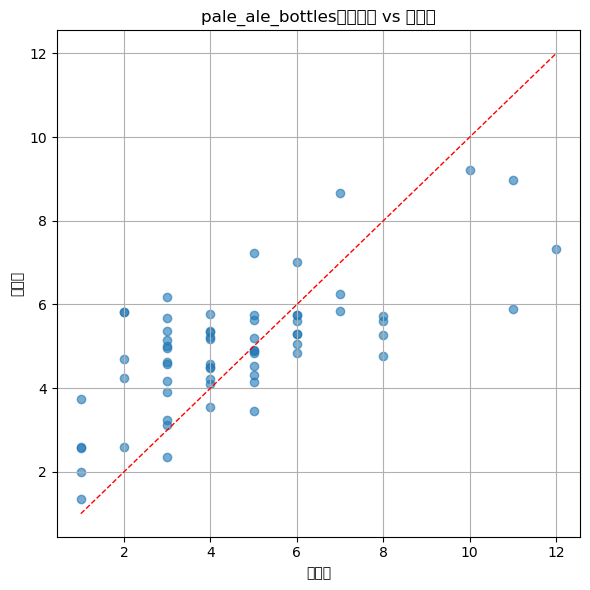

特征重要性：
is_friday                    38.273724
apparent_temperature_mean    23.030166
shortwave_radiation_sum      20.628330
precipitation_sum            18.067780
dtype: float64

===== lager_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.747
验证 R²: 0.633


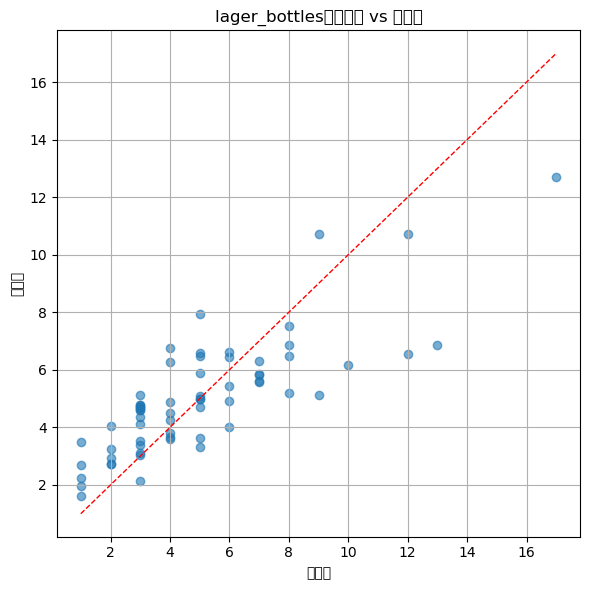

特征重要性：
is_friday                    36.968954
apparent_temperature_mean    27.559164
shortwave_radiation_sum      18.072228
precipitation_sum            17.399654
dtype: float64

===== ipa_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.652
验证 R²: 0.568


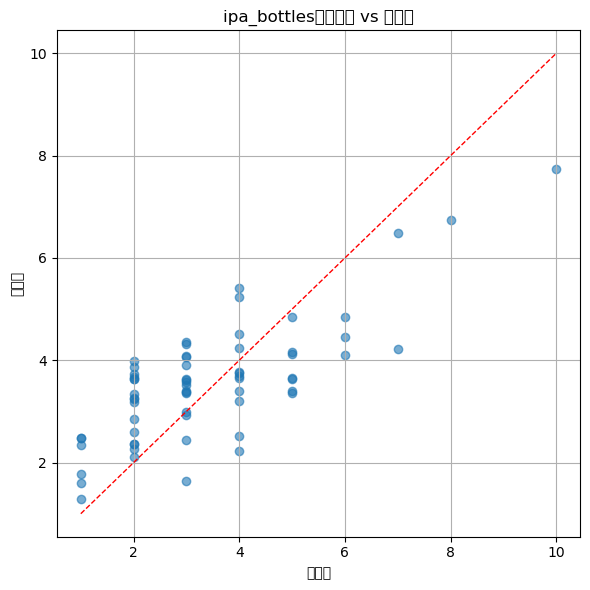

特征重要性：
is_friday                    36.216076
apparent_temperature_mean    24.622631
shortwave_radiation_sum      23.325797
precipitation_sum            15.835496
dtype: float64

===== white_beer_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.679
验证 R²: 0.610


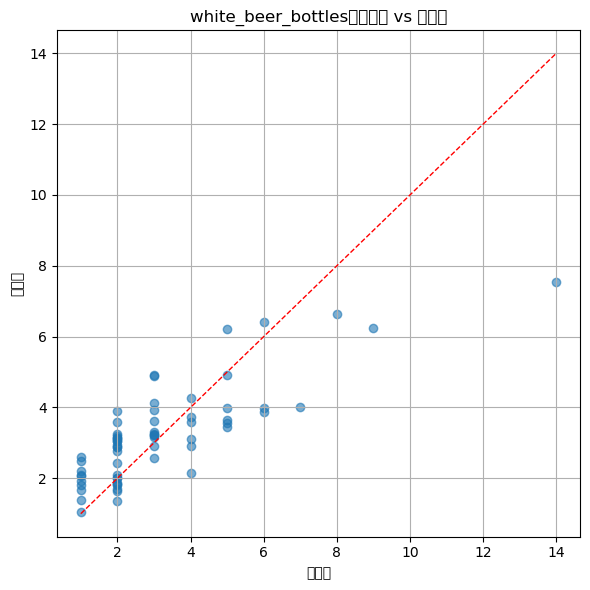

特征重要性：
apparent_temperature_mean    35.520123
is_friday                    33.520132
shortwave_radiation_sum      18.399387
precipitation_sum            12.560358
dtype: float64

===== dark_beer_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.663
验证 R²: 0.384


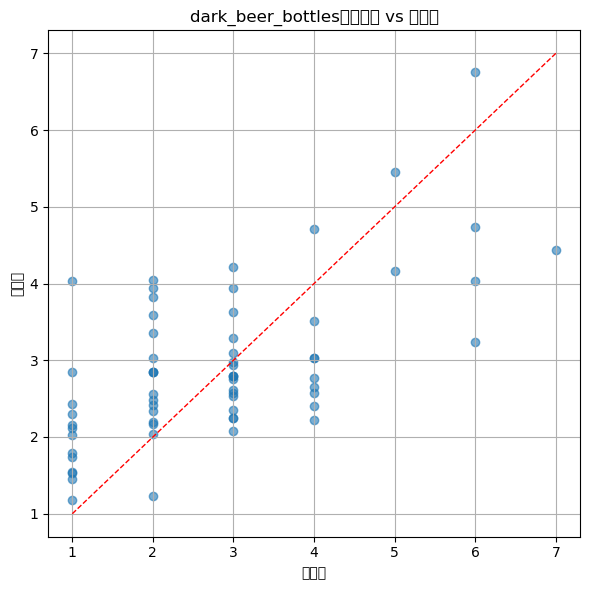

特征重要性：
apparent_temperature_mean    40.185034
is_friday                    25.512123
shortwave_radiation_sum      17.287827
precipitation_sum            17.015015
dtype: float64

===== fruit_beer_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.434
验证 R²: 0.201


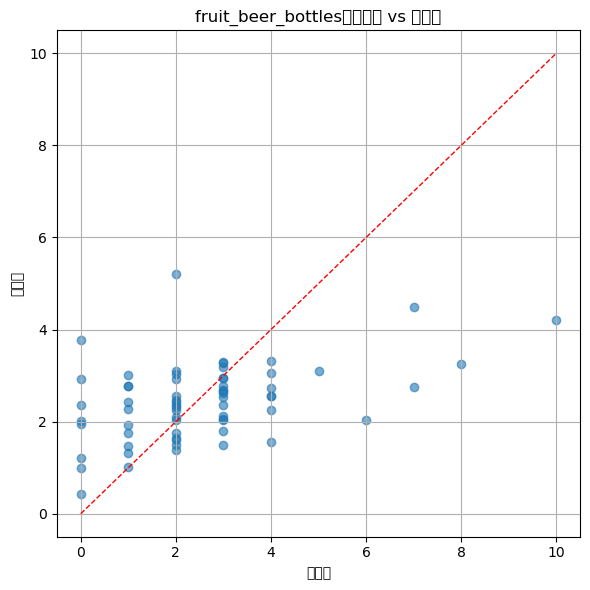

特征重要性：
shortwave_radiation_sum      32.698018
apparent_temperature_mean    30.252862
is_friday                    23.852969
precipitation_sum            13.196150
dtype: float64



In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. 数据加载
df = pd.read_feather("newdf.feather")

# 2. 日期和星期信息处理
df['date'] = pd.to_datetime(df['date'])
df['is_friday'] = (df['date'].dt.weekday == 4).astype(int)

# 3. 定义特征列和目标列（预测数量）
feature_columns = [
    'is_friday',
    'apparent_temperature_mean',
    'precipitation_sum',
    'shortwave_radiation_sum'
]
target_columns = [
    'pale_ale_bottles',
    'lager_bottles',
    'ipa_bottles',
    'white_beer_bottles',
    'dark_beer_bottles',
    'fruit_beer_bottles'
]

# 4. 删除缺失值
df.dropna(subset=feature_columns + target_columns, inplace=True)

# 5. 创建保存模型的目录
os.makedirs("saved_models", exist_ok=True)

# 6. 超参数网格
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'iterations': [200]
}

# 7. 循环针对每个目标建模并绘图
for target in target_columns:
    print(f"===== {target} =====")
    X = df[feature_columns]
    y = df[target]

    # 划分训练/验证集
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 初始化 CatBoost 回归器
    model = CatBoostRegressor(verbose=0, random_seed=42)

    # 网格搜索
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='r2',
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train, cat_features=[0])
    best_model = grid_search.best_estimator_

    # 保存模型
    best_model.save_model(f"saved_models/{target}.cbm")

    # 输出分数
    train_r2 = best_model.score(X_train, y_train)
    val_r2   = best_model.score(X_val, y_val)
    print("最优参数：", grid_search.best_params_)
    print(f"训练 R²: {train_r2:.3f}")
    print(f"验证 R²: {val_r2:.3f}")

    # 绘制真实值 vs 预测值 散点图
    y_pred = best_model.predict(X_val)
    plt.figure(figsize=(6,6))
    plt.scatter(y_val, y_pred, alpha=0.6)
    plt.plot([y_val.min(), y_val.max()],
             [y_val.min(), y_val.max()],
             'r--', linewidth=1)
    plt.xlabel("真实值")
    plt.ylabel("预测值")
    plt.title(f"{target}：真实值 vs 预测值")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 输出特征重要性
    importances = pd.Series(
        best_model.feature_importances_, index=feature_columns
    )
    print("特征重要性：")
    print(importances.sort_values(ascending=False))
    print()


In [1]:
import os
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 1. 数据加载 & 预处理
df = pd.read_feather("./data/newdf.feather")
df['date'] = pd.to_datetime(df['date'])
df['is_friday'] = (df['date'].dt.weekday == 4).astype(int)

feature_columns = [
    'is_friday',
    'apparent_temperature_mean',
    'precipitation_sum',
    'shortwave_radiation_sum'
]
target_columns = [
    'pale_ale_bottles',
    'lager_bottles',
    'ipa_bottles',
    'white_beer_bottles',
    'dark_beer_bottles',
    'fruit_beer_bottles'
]
df.dropna(subset=feature_columns + target_columns, inplace=True)

# 2. 模型与对应的参数网格
model_constructors = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost':       XGBRegressor(random_state=42, verbosity=0),
    'LightGBM':      LGBMRegressor(random_state=42),
    'CatBoost':      CatBoostRegressor(verbose=0, random_seed=42)
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.05, 0.1]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'num_leaves': [31, 50],
        'learning_rate': [0.05, 0.1]
    },
    'CatBoost': {
        'iterations': [100, 200],
        'depth': [4, 6],
        'learning_rate': [0.05, 0.1]
    }
}

# 存放所有结果
results = {t: {} for t in target_columns}
best_models = {}

# 3. 针对每个目标进行网格搜索与评估
for target in target_columns:
    print(f"\n===== 目标：{target} =====")
    X = df[feature_columns]
    y = df[target]
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 对每个模型分别做 GridSearchCV
    for name, constructor in model_constructors.items():
        grid = GridSearchCV(
            estimator=constructor,
            param_grid=param_grids[name],
            scoring='r2',
            cv=5,
            n_jobs=-1
        )
        # CatBoost 需要通过 fit_params 传入类别特征索引
        fit_params = {'cat_features': [0]} if name == 'CatBoost' else {}
        grid.fit(X_train, y_train, **fit_params)

        # 在验证集上评估
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_val)
        val_r2 = r2_score(y_val, y_pred)

        # 保存结果
        results[target][name] = {
            'best_params': grid.best_params_,
            'cv_best_score': grid.best_score_,
            'val_r2': val_r2
        }

        print(f"{name:10s} | CV best R² = {grid.best_score_:.3f} | "
              f"Val R² = {val_r2:.3f} | params = {grid.best_params_}")

    # 选出该啤酒的最佳模型
    best_name = max(results[target].keys(),
                    key=lambda m: results[target][m]['val_r2'])
    best_score = results[target][best_name]['val_r2']
    best_models[target] = (best_name, best_score)
    print(f"--> 最佳模型：{best_name}，验证集 R² = {best_score:.3f}")

# 4. 汇总所有啤酒的最佳模型
print("\n===== 各啤酒最佳模型汇总 =====")
for target, (model_name, score) in best_models.items():
    print(f"{target:20s} -> {model_name:10s} (R² = {score:.3f})")



===== 目标：pale_ale_bottles =====
RandomForest | CV best R² = 0.209 | Val R² = 0.391 | params = {'max_depth': 10, 'n_estimators': 100}
XGBoost    | CV best R² = 0.266 | Val R² = 0.432 | params = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 254, number of used features: 4
[LightGBM] [Info] Start training from score 5.129921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

### cross validation improve

===== pale_ale_bottles =====
最適パラメータ: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.620
テスト R²: 0.399
特徴量重要度：
is_friday                    38.529629
precipitation_sum            22.375273
apparent_temperature_mean    20.285563
shortwave_radiation_sum      18.809535
dtype: float64


C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 36009 (\N{CJK UNIFIED IDEOGRAPH-8CA9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 25968 (\N{CJK 

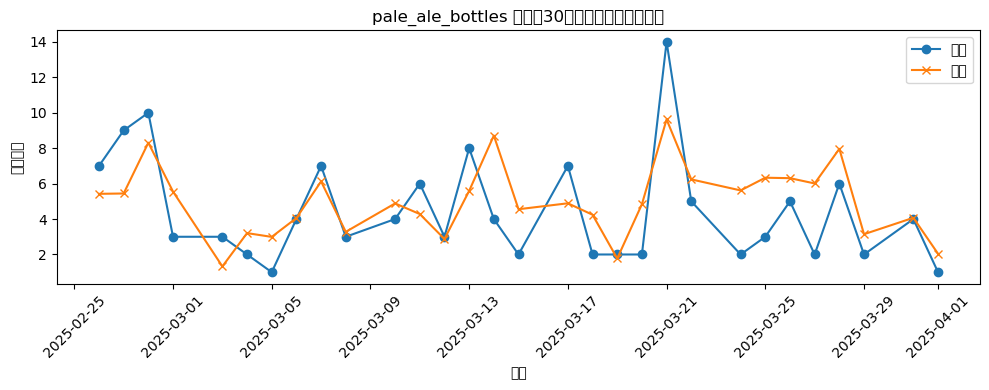


===== lager_bottles =====
最適パラメータ: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.736
テスト R²: 0.375
特徴量重要度：
is_friday                    35.746731
apparent_temperature_mean    29.055257
shortwave_radiation_sum      17.815142
precipitation_sum            17.382870
dtype: float64


C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 36009 (\N{CJK UNIFIED IDEOGRAPH-8CA9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 25968 (\N{CJK 

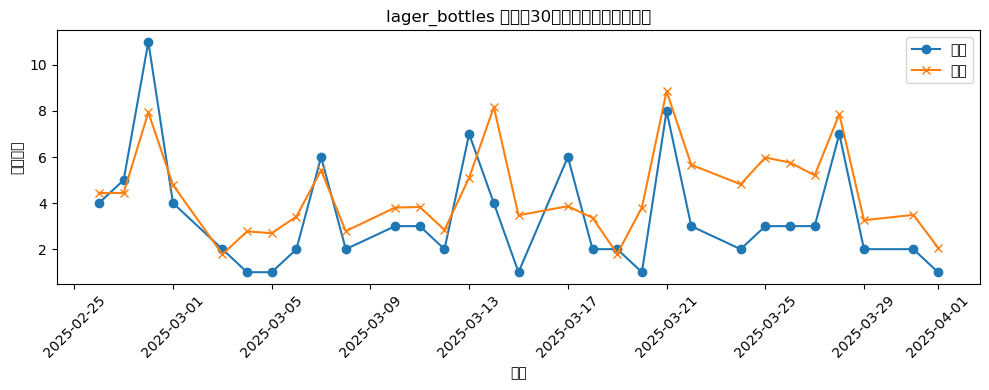


===== ipa_bottles =====
最適パラメータ: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.650
テスト R²: 0.207
特徴量重要度：
is_friday                    38.473263
shortwave_radiation_sum      23.759262
apparent_temperature_mean    20.360824
precipitation_sum            17.406651
dtype: float64


C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 36009 (\N{CJK UNIFIED IDEOGRAPH-8CA9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 25968 (\N{CJK 

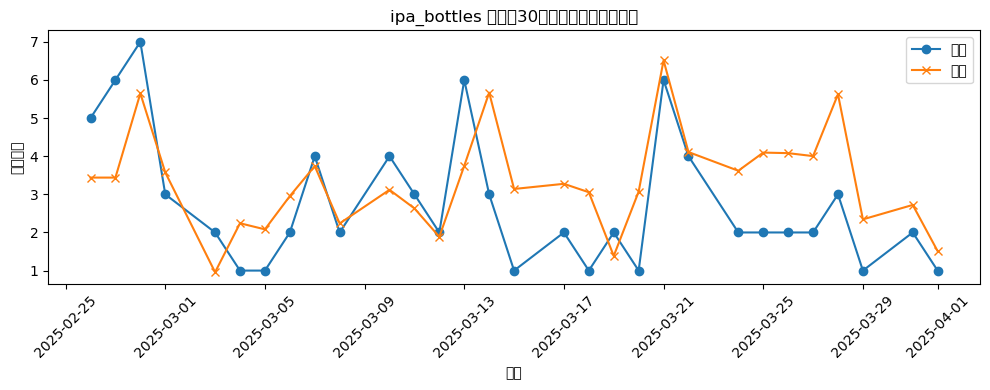


===== white_beer_bottles =====
最適パラメータ: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.708
テスト R²: 0.104
特徴量重要度：
is_friday                    33.041845
apparent_temperature_mean    31.614123
shortwave_radiation_sum      23.068687
precipitation_sum            12.275345
dtype: float64


C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 36009 (\N{CJK UNIFIED IDEOGRAPH-8CA9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 25968 (\N{CJK 

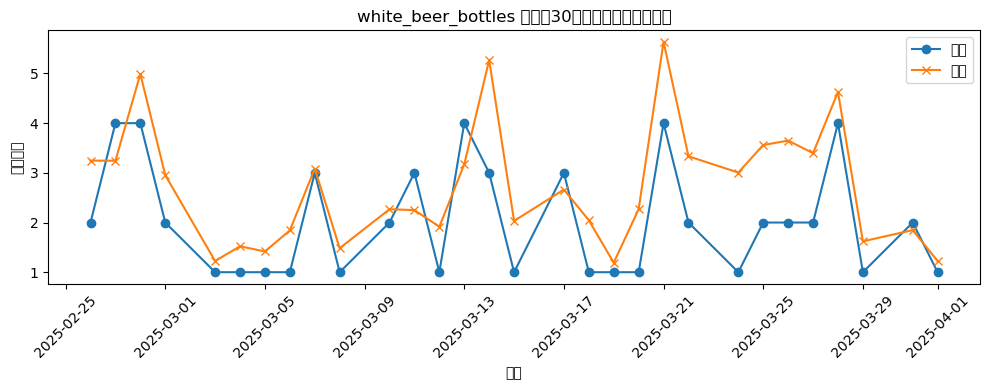


===== dark_beer_bottles =====
最適パラメータ: {'depth': 6, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.709
テスト R²: 0.431
特徴量重要度：
apparent_temperature_mean    33.674421
is_friday                    25.129521
shortwave_radiation_sum      22.058674
precipitation_sum            19.137384
dtype: float64


C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 36009 (\N{CJK UNIFIED IDEOGRAPH-8CA9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 25968 (\N{CJK 

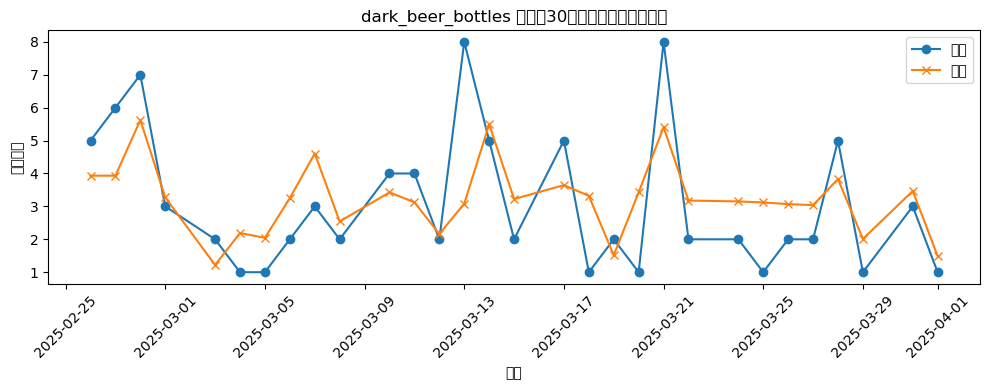


===== fruit_beer_bottles =====
最適パラメータ: {'depth': 8, 'iterations': 200, 'learning_rate': 0.05}
訓練 R²: 0.638
テスト R²: -0.179
特徴量重要度：
apparent_temperature_mean    32.603613
shortwave_radiation_sum      29.599574
precipitation_sum            19.460474
is_friday                    18.336339
dtype: float64


C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 36009 (\N{CJK UNIFIED IDEOGRAPH-8CA9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\81803\AppData\Local\Temp\ipykernel_16900\34947529.py:102: UserWarning: Glyph 25968 (\N{CJK 

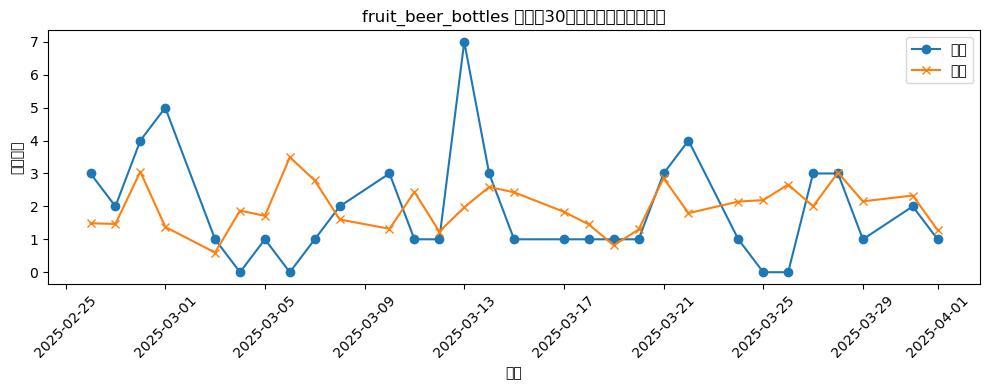

In [7]:
import os
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# データの読み込み
df = pd.read_feather("./data/newdf.feather")

# 2. 日付と曜日情報の処理
df['date'] = pd.to_datetime(df['date'])
# pandas の dt.weekday を使用（0=月曜日, 4=金曜日, 6=日曜日）
df['is_friday'] = (df['date'].dt.weekday == 4).astype(int)

# 特徴量とターゲット列
target_columns = [
    'pale_ale_bottles',
    'lager_bottles',
    'ipa_bottles',
    'white_beer_bottles',
    'dark_beer_bottles',
    'fruit_beer_bottles'
]
feature_columns = [
    'is_friday',
    'apparent_temperature_mean',
    'precipitation_sum',
    'shortwave_radiation_sum'
]

# 欠損値を含む行を削除
df.dropna(subset=target_columns + feature_columns, inplace=True)

# モデル保存用ディレクトリを作成
os.makedirs("saved_models", exist_ok=True)

# ハイパーパラメータのグリッド
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'iterations': [200]
}

# 各ターゲット変数に対してモデルを構築
for target in target_columns:
    print(f"===== {target} =====")
    X = df[feature_columns]
    y = df[target]

    # 最後の30日をテストデータとし、それ以前を訓練データとする
    X_train, X_test = X.iloc[:-30], X.iloc[-30:]
    y_train, y_test = y.iloc[:-30], y.iloc[-30:]
    dates_test = df['date'].iloc[-30:]

    # モデルの初期化
    model = CatBoostRegressor(
        verbose=0,
        random_seed=42
    )

    # グリッドサーチ
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='r2',
        cv=5,
        n_jobs=-1
    )
    
    # Is_Friday（0列目）をカテゴリ特徴量として扱う
    grid_search.fit(X_train, y_train, cat_features=[0])
    best_model = grid_search.best_estimator_

    # モデルを保存
    best_model.save_model(f"saved_models/{target}.cbm")

    # 訓練およびテストスコアを表示
    train_score = best_model.score(X_train, y_train)
    test_score   = best_model.score(X_test, y_test)
    print("最適パラメータ:", grid_search.best_params_)
    print(f"訓練 R²: {train_score:.3f}")
    print(f"テスト R²: {test_score:.3f}")

    # 特徴量重要度
    importances = pd.Series(
        best_model.feature_importances_,
        index=X.columns
    )
    print("特徴量重要度：")
    print(importances.sort_values(ascending=False))

    # 最後の30日間の実測値と予測値の折れ線グラフ
    y_pred = best_model.predict(X_test)
    plt.figure(figsize=(10, 4))
    plt.plot(dates_test, y_test.values, marker='o', label='実測')
    plt.plot(dates_test, y_pred,    marker='x', label='予測')
    plt.xlabel('日付')
    plt.ylabel('販売本数')
    plt.title(f"{target} の最後30日間の実測値と予測値")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print()
